# Delayed mode data


What if the Real-Time (RT) quality control is not enough?, or if we need the previous data of the float and the data from its neighbors to discern between subtle sensor malfunctioning and natural variability?.

This is where the second data quality control comes in. It is called Delayed - Mode (DM) quality control. Principal investigators and regional data experts are in charge of this meticulous task since it requires a more elaborate specific data analysis of every float and oceanographic expertise in the region where the float was deployed. 
The most common types of bad data are known as spikes, offsets, drifts, etc…
The spikes are abrupt short changes in the data and constitute a clear case of anomaly. Spikes are easy to detect and correct. Drifts and offsets can be identified in the trend of ΔS over time, where ΔS is the difference in salinity between float-measured values and statistical recommendations. If ΔS = a + bt, where t is time, then a is the offset and b is the drift rate. Note that these drifts and offsets can be sensor-related, or they can be due to natural variability, as we explained before. To distinguish between sensor errors and natural variability Evaluation is necessary that experts look carefully at the data. [L2-DM_QC_Graphics]

# Delayed mode files

Delayed mode profile files are the same as the Real-Time profile files, except their file names on the GDACs all contain a “D” before the WMO number (e.g. D5900400_001.nc, BD5904179_001.nc). These profile files contain delayed mode adjusted data, which are recorded in the variable <PARAM>_ADJUSTED. The variable DATA_MODE will record ‘D’. Two other variables are also filled in delayed mode, which are <PARAM>_ADJUSTED_QC and <PARAM>_ADJUSTED_ERROR, which record the delayed mode quality control flags and the delayed mode adjustment uncertainty.

Core Argo delayed mode files are available 1 – 2 years after a profile is taken; sometimes earlier. These have been subjected to detailed scrutiny by oceanographic experts and the adjusted salinity has been estimated by comparison with high-quality ship-based CTD data and Argo climatologies using the process described by Wong et al, 2003; Böhme and Send, 2005; Owens and Wong, 2009; Cabanes et al, 2016.

For BGC parameters, delayed mode files can be available within 5 – 6 cycles after deployment.  This is because the BGC sensors often return data that are out of calibration, but early adjustment methodologies exist that can significantly improve their accuracy.  Additional delayed mode quality control occurs when a longer record of float data is available.

To learn more about delayed mode quality control, read the papers on the methods linked above or see the ADMT documentation page for core Argo and BGC-Argo quality control documentation.


For each parameter, there are two variables associated with it:  a raw version and an adjusted version.  The raw version can be found in the “PARAM” variable (e.g. TEMP, PRES, DOXY) and the adjusted version can be found in the “PARAM_ADJUSTED” variable (e.g. TEMP_ADJUSTED, PRES_ADJUSTED, DOXY_ADJUSTED).

## Quality Control flags

|QCflag|Meaning|Real time description|Adjusted description|
|:----:|:-----:|:-------------------:|:------------------:|
|0 |No QC performed|No QC performed|XX|
|1 |Good data|All real time QC tests passed|XX|
|2 |Probably good data|	Probably good|XX|
|3 |Bad data that are potentially correctable|Test 15 or Test 16 or Test 17 failed and all other real-time QC tests passed. These  data are not to be used without scientific correction. A flag ‘3’ may be assigned by an operator during additional visual QC for bad |data that may be corrected in delayed mode.|XX|
|4 |Bad data|Data have failed one or more of the real-time QC tests, excluding Test 16. A flag ‘4’ may be assigned by an operator during additional visual QC for bad data that are not correctable.|XX|
|5 |Value changed|Value changed|XX|
|6 |Not currently used |Not currently used|XX|
|7 |Not currently used |Not currently used|XX|
|8 |Estimated |Estimated value (interpolated, extrapolated or other estimation)|XX|
|9 |Missing value|Missing value|XX|

### Example

In [1]:
import numpy as np
import netCDF4
import xarray as xr

import cartopy.crs as ccrs
import cartopy

import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
qcmap = mpl.colors.ListedColormap(['#000000' , '#31FC03' , '#ADFC03' , '#FCBA03' ,'#FC1C03',
                                   '#324CA8' , '#000000' , '#000000' , '#B22CC9', '#000000'])
def colorbar_qc(cmap, **kwargs):
    """Adjust colorbar ticks with discrete colors for QC flags"""
    ncolors = 10
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    return colorbar

In [3]:
# iwmo=6900768
# file=f"/Users/pvb/Dropbox/Oceanografia/Data/Argo/Floats/{iwmo}/{iwmo}_prof.nc"
iwmo=6901472
file=f"../../Data/{iwmo}/{iwmo}_prof.nc"
prof = xr.open_dataset(file)

All data, with any of the QC flags

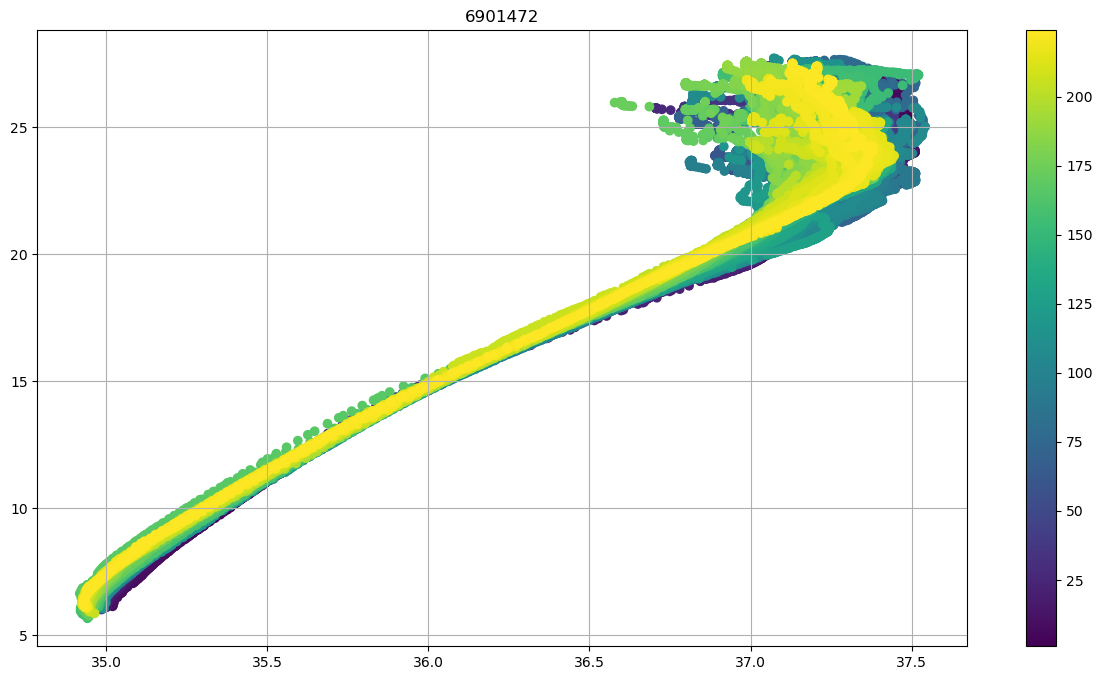

In [4]:
fig, ax = plt.subplots(figsize=(15,8))
sc = ax.scatter(prof.PSAL,prof.TEMP,c=prof.CYCLE_NUMBER+prof.PRES*0)
cbar=fig.colorbar(sc,ax=ax)
ax.set_title(f"{iwmo}")
ax.grid()

<xarray.DataArray 'PSAL' (N_PROF: 225, N_LEVELS: 1051)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Dimensions without coordinates: N_PROF, N_LEVELS
Attributes:
    long_name:       Practical salinity
    standard_name:   sea_water_salinity
    units:           psu
    valid_min:       2.0
    valid_max:       41.0
    C_format:        %9.3f
    FORTRAN_format:  F9.3
    resolution:      0.001

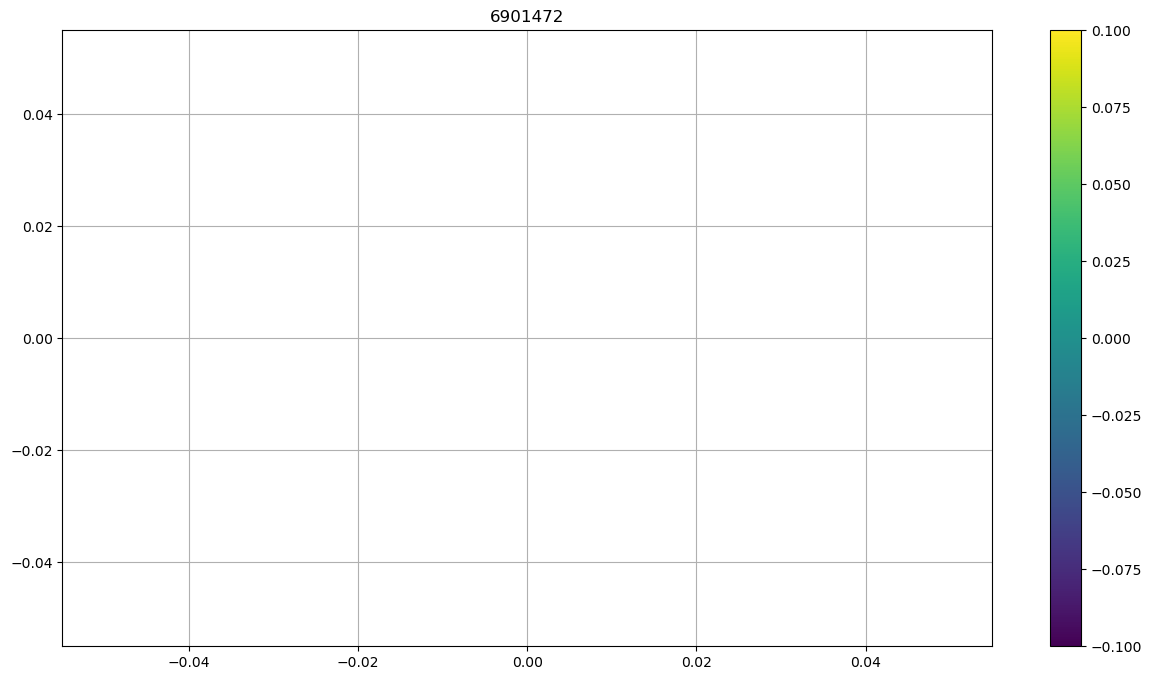

In [5]:
psal=prof.PSAL.where(prof.PSAL_QC.values.astype(float) == 2)
temp=prof.TEMP.where(prof.PSAL_QC.values.astype(float) == 2)

fig, ax = plt.subplots(figsize=(15,8))
sc = ax.scatter(psal,temp,c=prof.CYCLE_NUMBER+prof.PRES*0)
cbar=fig.colorbar(sc,ax=ax)
ax.set_title(f"{iwmo}")
ax.grid()
psal

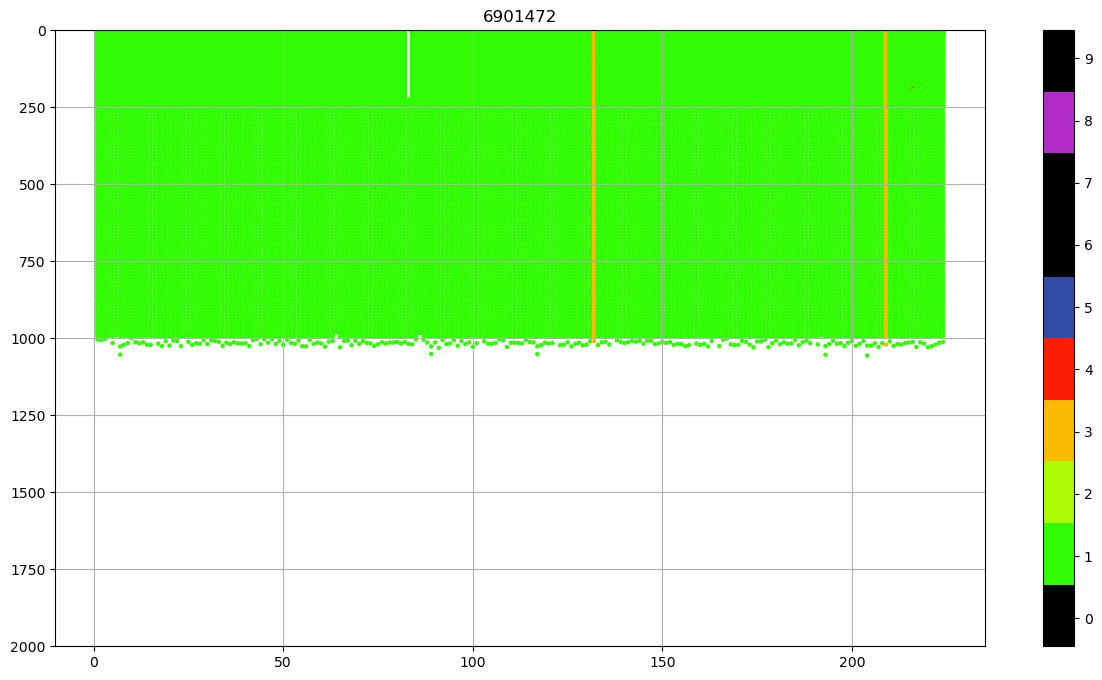

In [6]:
fig, ax = plt.subplots(figsize=(15,8))
sc = ax.scatter(prof.CYCLE_NUMBER+prof.PRES*0, 
                prof.PRES, 
                c=prof.PSAL_QC, vmin=0, vmax=9, cmap=qcmap, s=5)
colorbar_qc(qcmap, ax=ax)
ax.set_title(f"{iwmo}")
ax.grid()
ax.set_ylim(0,2000)
ax.invert_yaxis()   

In [7]:
prof.PSAL[90,:]

<xarray.DataArray 'PSAL' (N_LEVELS: 1051)>
array([37.412, 37.412, 37.413, ...,    nan,    nan,    nan], dtype=float32)
Dimensions without coordinates: N_LEVELS
Attributes:
    long_name:       Practical salinity
    standard_name:   sea_water_salinity
    units:           psu
    valid_min:       2.0
    valid_max:       41.0
    C_format:        %9.3f
    FORTRAN_format:  F9.3
    resolution:      0.001

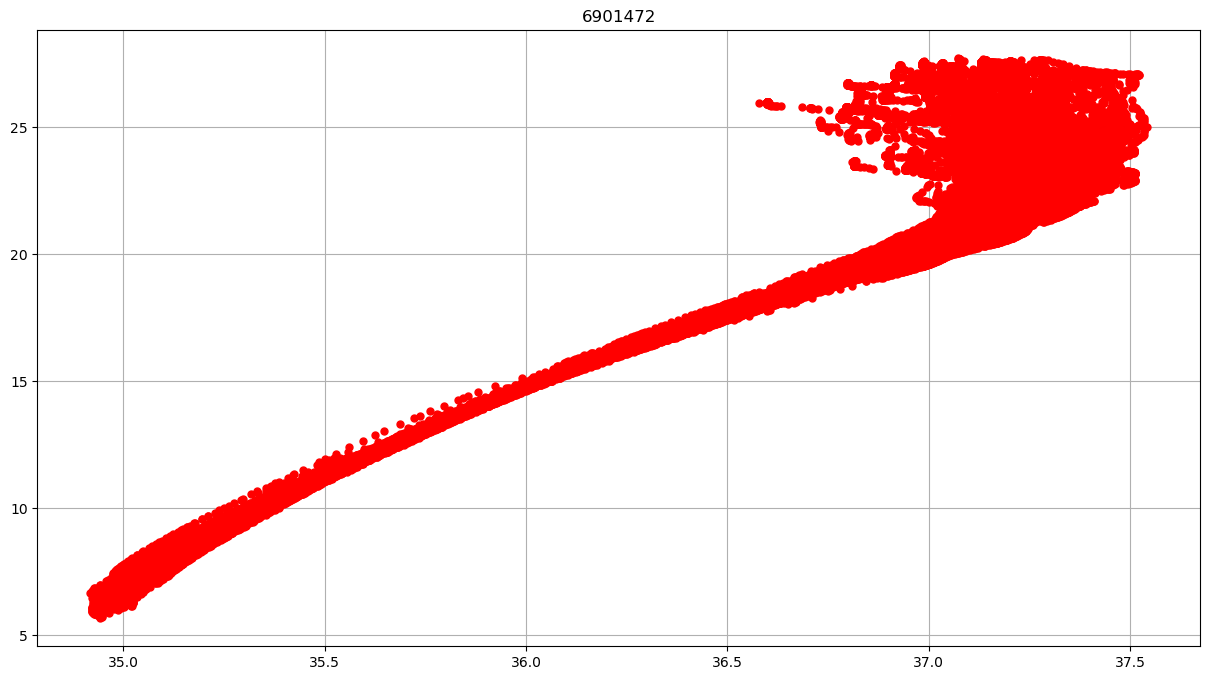

In [8]:
fig, ax = plt.subplots(figsize=(15,8)) 
scRT = ax.plot(prof.PSAL, prof.TEMP, 'ro', markersize=5)
scAD = ax.plot(prof.PSAL_ADJUSTED, prof.TEMP_ADJUSTED, 'bo',markersize=5)
ax.set_title(f"{iwmo}")
ax.grid()

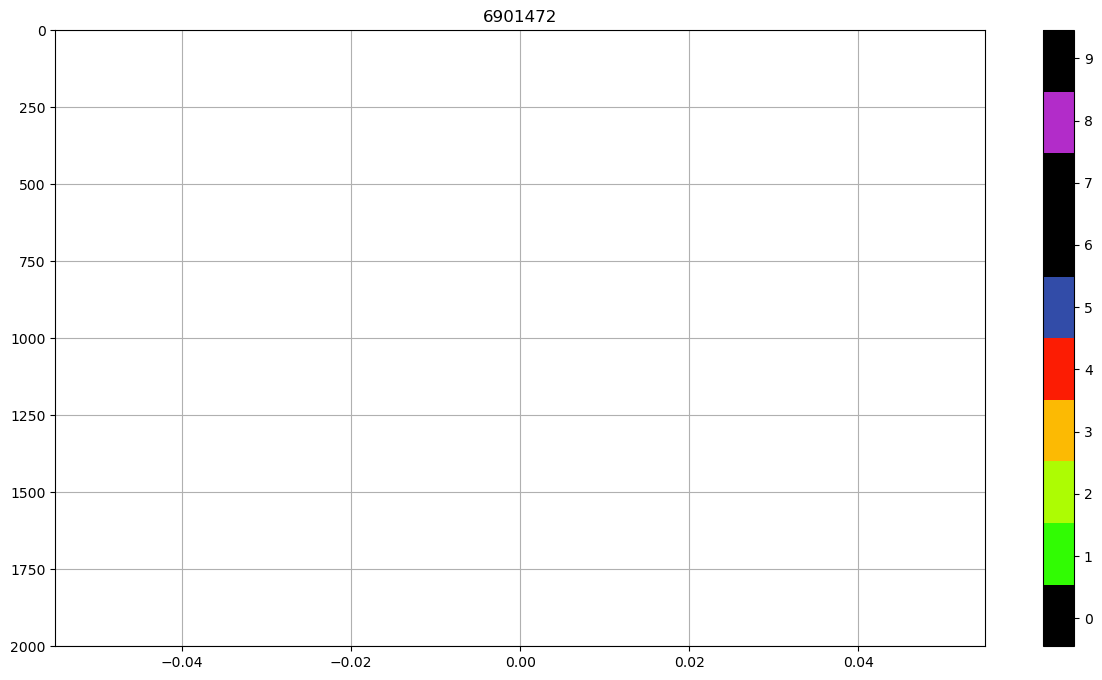

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
sc = ax.scatter(prof.CYCLE_NUMBER+prof.PRES*0, 
                prof.PRES_ADJUSTED, 
                c=prof.PSAL_ADJUSTED_QC, vmin=0, vmax=9, cmap=qcmap, s=5)
colorbar_qc(qcmap, ax=ax)
ax.set_title(f"{iwmo}")
ax.grid()
ax.set_ylim(0,2000)
ax.invert_yaxis()   

In [10]:
prof

<xarray.Dataset>
Dimensions:                       (N_PROF: 225, N_PARAM: 3, N_LEVELS: 1051,
                                   N_CALIB: 1, N_HISTORY: 0)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_CALIB, N_HISTORY
Data variables: (12/64)
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    DATE_CREATION                 object ...
    DATE_UPDATE                   object ...
    ...                            ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) object ...
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) object ...
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 ...
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) float32 ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object ...
Attributes:
    title:                Argo float vertical profile
    institution:          FR GDAC
    source:               Argo float
    history:              2020-01-22T14:10:57Z creation
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  3.1
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile